> find shortest path length
> safe it so it can be quickly read back
> create path that is unique for this
> pick the same number of edges of each conditions (so that they are comparable)
> run on node2vec
> run on all classifiers of node2vec
> run GCN and save it to its classifier

In [ ]:
>>> from collections import OrderedDict
>>> dd = OrderedDict(sorted(d.items(), key=lambda x: x[1], reverse=True))
>>> print(dd)
OrderedDict([('Pierre', 24), ('Anne', 33), ('Zoe', 42)])

In [132]:
import pandas as pd
def Merlin_pandas(l):
    '''return dict that after apply cumsum to pandas'''
#     df = pd.DataFrame(l).rename(columns=tmp)
    df = pd.DataFrame(l, index = [0])
#     print(df)
    df = pd.concat([df]*2, ignore_index = True)
    df.iloc[1] = df.iloc[0].cumsum()
#     print(df)
    tmp = df
    return tmp 
#     return df.to_dict(orient='')
tmp = {'0': 5, '1': 8, '2': 6, '3': 4, '4': 2}
Merlin_pandas(tmp)

,0,1,2,3,4
0,5,8,6,4,2
1,5,13,19,23,25


In [109]:
tmp[tmp.keys()]

TypeError: unhashable type: 'dict_keys'

In [267]:
G = nx.path_graph(5)
length = list(nx.all_pairs_shortest_path_length(G))
length

[(0, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}),
 (1, {1: 0, 0: 1, 2: 1, 3: 2, 4: 3}),
 (2, {2: 0, 1: 1, 3: 1, 0: 2, 4: 2}),
 (3, {3: 0, 2: 1, 4: 1, 1: 2, 0: 3}),
 (4, {4: 0, 3: 1, 2: 2, 1: 3, 0: 4})]

In [273]:
G = nx.path_graph(5)
tmp = {}
for i in [0,1,4]:
    tmp.setdefault('tmp',[]).append([i, nx.shortest_path_length(G, source=i)])
tmp['tmp']

[[0, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}],
 [1, {1: 0, 0: 1, 2: 1, 3: 2, 4: 3}],
 [4, {4: 0, 3: 1, 2: 2, 1: 3, 0: 4}]]

In [280]:
G = nx.path_graph(5)
tmp = {}
for i in [0,1,4]:
    tmp1 = {}
    for j in [0,1,4]:
        tmp1[j] = nx.shortest_path_length(G, source=i, target=j)
#         tmp1.setdefault(i,{}).updated({nx.shortest_path_length(G, source=i, target=j)})

    tmp.setdefault('tmp',[]).append([i, tmp1])
tmp['tmp']

[[0, {0: 0, 1: 1, 4: 4}], [1, {0: 1, 1: 0, 4: 3}], [4, {0: 4, 1: 3, 4: 0}]]

In [282]:
G.edges

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4)])

In [283]:
G.add_edges_from([[0,0]])

In [284]:
nx.to_numpy_matrix(G)

matrix([[1., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0.]])

In [295]:
import networkx as nx
import collections
from collections import OrderedDict
from operator import itemgetter 

G = nx.complete_graph(5)
length = nx.all_pairs_shortest_path_length(G)
# print([i for i in length])
def pick_longest_path(length,amount=None):
    tmp ={}
    count_same_val = collections.OrderedDict({})
#     print([i for i in length])
    for i in length:
#         print(i)
        for j, val in i[1].items():
            if j >= i[0]:
                tmp[f'{i[0]}_{j}'] = val
    #             print(tmp[f'{i[0]}_{j}'])
                if count_same_val.setdefault(val, None) is None:
                    count_same_val[val] = 1
                else:
                    count_same_val[val] += 1    
    print(tmp)
#     print(count_same_val)
    print(length)
#     tmp = sorted((v,k) for k,v in tmp.items())[::-1]
    tmp = np.array( sorted(tmp.items(), key=lambda tmp: tmp[1], reverse= True))
    
    edges = tmp[:,0]
    tmp = tmp[:,1].astype(int)
    
    count_same_val = OrderedDict(sorted(count_same_val.items(), key=itemgetter(0), reverse=True))
    ind = 0 
    print(f'tmp = {tmp}')
    print(f'count_same_val = {count_same_val}')
    # apply cumsum to pandas
    df = Merlin_pandas(count_same_val) # cumsum with the same key 
    print(f'df = {df}')
    picked = None
    cumsum = df.iloc[1].to_dict()
    for i ,(k,v) in enumerate(cumsum.items()):
        if i == 0 and v < amount:
            picked = v
        if i == 0 and v > amount:
            picked = amount
            break
#             print(picked)
        if v <= amount:
            picked = v
   
    picked = list(range(picked))
    print(f'picked = {picked}')
    left_num = amount - len(picked)
    if left_num > 0:
        tmp = tmp[tmp == tmp[max(picked)+1]]
        print(tmp)
        prob = [1/len(tmp) for i in range(len(tmp))]
        more_picked = np.random.choice(range(len(tmp)), left_num, prob)
        more_picked += len(picked)
        more_picked = list(more_picked)
        print(more_picked)
        picked += more_picked
        print(picked)

    print(f"picked = {picked}")
    # get edgse
    picked_edges = edges[picked]
    picked_edges = np.array([i.split('_') for i in picked_edges])
    
    return picked_edges

print(pick_longest_path(length, 2))

{'0_0': 0, '0_1': 1, '0_2': 1, '0_3': 1, '0_4': 1, '1_1': 0, '1_2': 1, '1_3': 1, '1_4': 1, '2_2': 0, '2_3': 1, '2_4': 1, '3_3': 0, '3_4': 1, '4_4': 0}
<generator object all_pairs_shortest_path_length at 0x0000015694C78C00>
tmp = [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
count_same_val = OrderedDict([(1, 10), (0, 5)])
df =     1   0
0  10   5
1  10  15
picked = [0, 1]
picked = [0, 1]
[['0' '1']
 ['0' '2']]


In [373]:
x = 5
f"ss{x}"

'ss5'

> write script to collect data of the same condition or threshold
> Goal here is to identify which of these models are the best and how much better
    > apply ranking statistic ()

cond ===== False


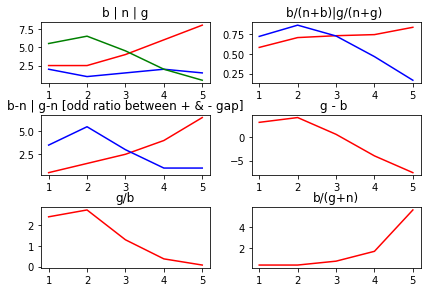

cond ===== False


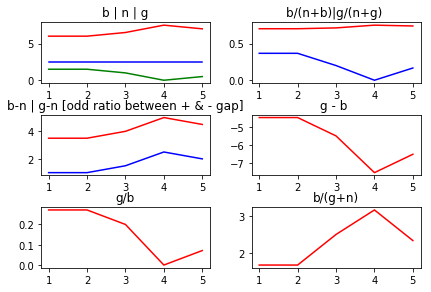

cond ===== True


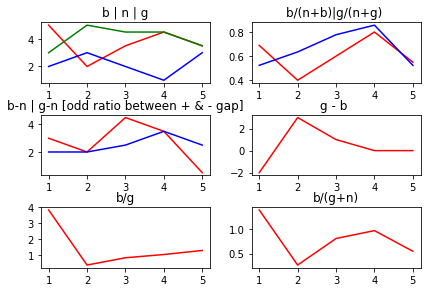

cond ===== False


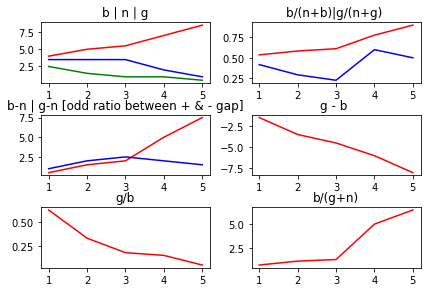

In [41]:
import matplotlib.pyplot as plt
import numpy as np
# bng = np.array([[7,0,3], [6,0,3], [6,2,2], [6,2,2],[4,4,2],[2,4,4]]) # top_k
# bng = np.array([[1,3,6], [2,1,7], [5,2,3], [6,2,1],[6,1,3],[4,3,3]]) # top_k_stoch
# bng = np.array([[2,3,5], [1,3,6], [4,1,5], [2,2,6],[4,1,5],[6,2,2]]) # bottom_k
# bng = np.array([[4,3,4], [1,2,6], [4,4,2], [5,3,2],[7,0,3],[6,2,2]]) # bottom_k_stoch

# bng = np.array([[3,3,4], [2,1,7], [3,1,6], [5,2,3],[7,2,1],[9,1,0]]) # top_bottom_k_stoch
# bng = np.array([[5,3,2], [7,2,1], [5,3,2], [8,2,0],[7,3,0],[7,2,1]]) # top_bottom_k
# bng = np.array([[7,2,1], [3,2,5], [1,4,5], [6,0,4],[3,2,5],[4,4,2]]) # all_nodes_random
# bng = np.array([[4,3,3], [4,4,2], [6,3,1], [5,4,1],[9,0,1],[8,2,0]]) # shared_nodes_random
models = np.array([[[3,3,4], [2,1,7], [3,1,6], [5,2,3],[7,2,1],[9,1,0]], # top_bottom_k_stoch
            [[5,3,2], [7,2,1], [5,3,2], [8,2,0],[7,3,0],[7,2,1]], # top_bottom_k
            [[7,2,1], [3,2,5], [1,4,5], [6,0,4],[3,2,5],[4,4,2]], # all_nodes_random
            [[4,3,3], [4,4,2], [6,3,1], [5,4,1],[9,0,1],[8,2,0]]]) # shared_nodes_random
import numpy as np

def calcSma(data, smaPeriod):
    j = next(i for i, x in enumerate(data) if x is not None)
    our_range = range(len(data))[j + smaPeriod - 1:]
    empty_list = [None] * (j + smaPeriod - 1)
    sub_result = [np.mean(data[i - smaPeriod + 1: i + 1]) for i in our_range]

    return np.array(empty_list + sub_result)

# def get_x_y(*args, **kwargs):
    
#     lines = np.array([i for i in args]).T

#     ths = [0.05,0.1,0.2,0.3,0.4,0.5]
#     ths = ths[:bng.shape[0]]
#     colors = ['red','blue','green','pink']
        
# def plot_distrib():
#     pass

def plotting(*args, **kwargs):
    lines = np.array([i for i in args]).T
#     lines = np.array([line0,line1]).T
    ths = [0.05,0.1,0.2,0.3,0.4,0.5]
    ths = ths[:bng.shape[0]]
    colors = ['red','blue','green','pink']
        
    # todo plot on figure
    pos = int('32'+str(kwargs['fig']))
#     print(int('32'+str(kwargs['fig'])))
    y = []
    for ind,(i,j) in enumerate(zip(lines.T,colors[:lines.shape[1]])):
#         print(i)
#         y.append(calcSma(i, 2))
        y.append(calcSma(i, 2))
#         y.append(i)

    pos = kwargs['fig']
    return y, colors[:lines.shape[1]], pos, kwargs['title']
#     for ind,(i,j) in enumerate(zip(lines.T,colors[:lines.shape[1]])):
#         tmp = calcSma(i, 2)
#         ind = ind+1
#         plt.plot(tmp, color=j)

    
    
def one(bng, fig=1):
    line0 = bng[:,0]
    line1 = bng[:,1]
    line2 = bng[:,2]
    # line for reach threshold
#     lines = np.array([line0, line1,line2]).T
#     plotting(lines)
    
    return plotting(line0,line1,line2, title='b | n | g', fig=fig)
#     plotting(line1,line2)
def two(bng, fig=2):

    line1 = [] # line 1 for each of the theshold
    line2= []
    for b,n,g in bng:
        line1.append(b/(n+b))
        line2.append(g/(n+g))
    # line for reach threshold
    
    return plotting(line1,line2, title='b/(n+b)|g/(n+g) ', fig=fig)
    
# from math import abs
def three(bng, fig=3):
    line0 = []
    line1 = []
    for b,n,g in bng:
        line0.append(abs(b-n))
        line1.append(abs(g-n))
        
#         line0.append(b-n)
#         line1.append(g-n)
    
    return plotting(line0,line1, title='b-n | g-n [odd ratio between + & - gap]', fig=fig)
def four(bng, fig=4):
    line0 = []
    for b,n,g in bng:
        line0.append(g-b)
    return plotting(line0, title="g - b ", fig=fig)

def five(bng, fig=4):
    line0 = []
    for b,n,g in bng:
        line0.append((g-b)/n)
    return plotting(line0, title = '(g-b)/n', fig=fig)
# funcs = [one, two, three, four, five, six, seven]
def six(bng, fig=5):
    line0 = []
    cond = np.array([False if g ==0 else True for b,n,g in bng ]).all()
    print(f'cond ===== {cond}')
    if cond:
        for b,n,g in bng:
            line0.append(b/g)
        
        return plotting(line0,title = 'b/g', fig=fig)
    else:
        for b,n,g in bng:
            line0.append(g/b)
        
        return plotting(line0,title = 'g/b', fig=fig)
def seven(bng, fig=6):
    line0 = []
    for b,n,g in bng:
        line0.append(b/(g+n))
    return plotting(line0, title='b/(g+n)', fig=fig)
    
funcs = [one, two, three,  four, six, seven ]
# funcs = [one, two]
for bng in models:
    figure = {}
    for ind,i in enumerate(funcs):
    #     i(bng)
        y, color, pos, title = i(bng)
        figure[f'fig{ind}'] = {}
        figure[f'fig{ind}']['pos'] = pos
        figure[f'fig{ind}']['y'] = y
        figure[f'fig{ind}']['color'] = color
        figure[f'fig{ind}']['title'] = title

    fig, axes = plt.subplots(nrows=3, ncols=2)
    fig.tight_layout()    
    for k,v in figure.items():
    #     print(v['pos'])
    #     print(v['y'])
    #     plt.subplot(v['pos'])
        tmp = (v['pos'] - 1)/ 2
        r = int(tmp)  
        c = (v['pos'] -1) %2 


        for i,j in zip(v['y'], v['color']):
#             print(j)
            axes[r][c].plot(i, color=j)
            axes[r][c].set_title(v['title'])

    plt.show()
    # list(get_color(['red','green','blue','pink']))
    # add smooth of the last 1 step

In [634]:
#T-test

x = np.array([68.3, 70.7, 73.2,73.2,73.2, 75.6,78.0,78.0,78.0,82.9])# best )
y = np.array([61,63.4,65.9,65.9,68.3,68.3,70.7,70.7,73.2,73.2])
# x = np.array([3,3,3,12,15,16,17,19,23,24,32])
# y = np.array([20,13,13,20,29,32,23,20,25,15,30])

from math import pow
import math
def sum_differences(x,y):
#     print(x.sum() - y.sum())
#     return x.sum() - y.sum()
    return (x-y).sum()

def sum_square_differences(x,y):
    return (((x - y) ** 2).sum())
    

def T_test(x,y):
    assert len(x) == len(y), 'len are not equal'
    N = len(x)
    tmp = sum_differences(x,y) / N
    tmp1 = (sum_square_differences(x,y) - ((sum_differences(x,y) ** 2)/N))
    tmp1 = math.sqrt(tmp1/((N-1) * N))
    tmp = tmp/tmp1
    return tmp
    
    
    
T_test(x,y)

16.152569820651625

In [122]:
#T-test pair
x = np.array([68.3, 70.7, 73.2,73.2,73.2, 75.6,78.0,78.0,78.0,82.9])# best )
# x = np.array([61.0,63.4,63.4, 65.9,65.9,65.9,68.3,73.2,73.2,73.2 ])
y = np.array([61,63.4,65.9,65.9,68.3,68.3,70.7,70.7,73.2,73.2])
n = len(x)
def T_test_pairwise(x, y ):
    assert len(x) == len(y), 'aslkfj;as'
    tmp =x.mean() - y.mean()
    tmp = tmp/(((x.std() ** 2)/ n) + (y.std() ** 2)/n)
#     print(tmp)
    return tmp
T_test_pairwise(x,y)

2.270290114094148

In [2]:
import os
import pandas as pd
import re
tmp = r'C:\Users\awannaphasch2016\PycharmProjects\disease_node_classification\log\gene_disease\07_14_19_46\classifier'
folder = {}

for r,d,f in os.walk(tmp,topdown=True):
#     print( r.split('\\')[-1])
#     if r.split('\\')[-1] == 'node2vec':
#         print(d)
    try:
        x = r.split('\\') 
        added_edges_option = x[-8]
        clf = x[-7]
        split = x[-6]
        emb = x[-4]
        cond = x[-3]
        th = x[-2]
        test_train_en = x[-1]
    except:
        added_edges_option, clf, split, emb, cond, th = None, None, None, None, None, None
    
#     if added_edges_option == 'shared_gene' and split == 'split=0.6' and x[-5] == 'report_performance' and emb == 'node2vec' and  x[-1] =='ensemble':
#     if added_edges_option == 'longest_path' and split == 'split=0.6' and x[-5] == 'report_performance' and emb == 'node2vec' and  x[-1] =='ensemble':
#     if ((x[-8] == 'no_shared_gene' and x[-6] == 'split=0.6') or (x[-8] == 'shared_gene' and split == 'split=0.6') or (x[-7] == 'longest_path' and x[-5] == 'split=0.6')) and emb == 'node2vec':
#     print(x[-7])
    if ((x[-8] == 'no_shared_gene' and x[-6] == 'split=0.6')) and emb == 'node2vec':
#     if (x[-7] == 'longest_path' and x[-5] == 'split=0.6') and emb == 'node2vec':
#         print(added_edges_option)
#         print(x[-7].strip(' ') =='longest_path')
#         print(x[-8].strip(' ') == 'shared_gene')
        if x[-7].strip(' ') in ['longest_path','no_shared_gene']:
#             added_edges_option = 'longest_path'
            added_edges_option = 'no_shared_gene' if x[-7].strip(' ') == 'no_shared_gene' else 'longest_path'
            split = x[-5]
            clf = x[-6]
        if x[-8].strip(' ') == 'shared_gene':
            added_edges_option = 'shared_gene'
            split = x[-6]
            clf = x[-7]
#             print(added_edges_option)
        try:
#             assert added_edges_option in ['longest_path', 'shared_gene'], f'{added_edges_option}, {x[-7]}, {x[-8]}'
            if test_train_en in ['test', 'train' ,'ensemble']: 
                folder.setdefault(added_edges_option, {})
                folder[added_edges_option].setdefault(clf, {})
                folder[added_edges_option][clf].setdefault(split, {})
                folder[added_edges_option][clf][split].setdefault(emb, {})
                folder[added_edges_option][clf][split][emb].setdefault(cond, {})
                folder[added_edges_option][clf][split][emb][cond].setdefault(th, {'test': None,
                                                                            'train':None,
                                                                            'ensemble':None})

                tmp2 = {}
                for file in f:
                    tmp = pd.read_csv(os.path.join(r,file), sep='\t', index_col=False)
                    avg_total = re.findall(f'[0-9]+[.]+[0-9]+',tmp.iloc[-1][0])
                    cols = re.findall(r'[a-z|A-Z][a-z|A-Z]+', tmp.columns[0])

                    for ind,(i,j) in enumerate(zip(cols, avg_total)):
                        tmp2.setdefault(ind, []).append(j)   
        #                 print(tmp2)
                folder[added_edges_option][clf][split][emb][cond][th][test_train_en] = pd.DataFrame.from_dict(tmp2, orient='columns')
#                 print(folder[added_edges_option][clf][split][emb][cond][th][test_train_en])
                folder[added_edges_option][clf][split][emb][cond][th][test_train_en].columns = cols
        except:
            print(added_edges_option, clf, emb, cond, th, test_train_en)
#             print(folder[added_edges_option][clf][split][emb][cond][th][test_train_en].columns)
            print(folder[added_edges_option][clf][split][emb][cond][th][test_train_en])
            print(cols)
#             raise ValueError()
#             if folder[added_edges_option][clf][split][emb][cond][th][test_train_en].shape[0] <10:
#                 print(r)
#                 print(folder[added_edges_option][clf][split][emb][cond][th][test_train_en].shape)
# added_edges_option = 'longest_path'
added_edges_option = ['longest_path', 'shared_path']
split = 'split=0.6'
emb = 'node2vec'
cond = ['all_nodes_random','bottom_k','bottom_k_stoch','shared_nodes_random','top_bottom_k','top_bottom_k_stoch','top_k', 'top_k_stoch']
th = ['0.1', '0.2', '0.3', '0.4', '0.5','0.05']
test_train_en = ['test', 'ensemble']


# for i,j in folder[added_edges_option][split][emb][cond][th].items():
#     print(i)
#     print(j)
#     print('==')


In [160]:
folder.keys()

dict_keys(['no_shared_gene'])

In [3]:
# x = np.array([68.3, 70.7, 73.2,73.2,73.2, 75.6,78.0,78.0,78.0,82.9, 58.5,61.0,63.4,65.9,65.9,68.3,70.7,70.7,73.2,73.2])

x = np.array([68.3, 70.7, 73.2,73.2,73.2, 75.6,78.0,78.0,78.0,82.9]) # best 
# y = np.array([61,63.4,65.9,65.9,68.3,68.3,70.7,70.7,73.2,73.2])
y = np.array([61   , 63.4 , 65.9 , 65.9 , 68.3 , 68.3 , 70.7 , 70.7 , 73.2,73.2]) # using svm  



# np.random.seed(1)
def permutation_test(x, y):
#     x += y
#     x = np.array(x).copy()
    tmp = x.sum()
    tmp1 = y.sum()
    x = np.hstack((x,y))
#     print(x)
    b_w = 'better' if (tmp - tmp1 ) < 0 else 'worse'
    th = np.abs(tmp-tmp1)
    count = 0
    num = 1000
    max_val = 0
    for i in range(num):
        ind = np.random.choice(range(20), 10, replace=False)
        one = x[ind]
        two = list(set(range(20)).difference(set(ind)))
        two = x[two]
        one = one.sum()
        two = two.sum()
        diff = np.abs(one-two)
#         print(diff)
        
        if max_val < diff:
            max_val = diff
        if diff > th:
            count +=1
#     print(f'threshold = {th}')
#     print(f'max_val = {max_val}')
#     print(f'count = {count}')
    confident = count/num
    confident = 100 -(confident * 100)
#     print('confident = ' + str(confident))
    return confident, b_w

permutation_test(x,y)

(99.9, 'worse')

In [4]:
import math
x = np.array([0.61 , 0.634, 0.659, 0.659, 0.683, 0.683, 0.707, 0.707, 0.732, 0.732])
# y = np.array([61   , 63.4 , 65.9 , 65.9 , 68.3 , 68.3 , 70.7 , 70.7 , 73.2,73.2])
# x = np.array([15.2,15.3,16,15.8,15.6,14.9,15,15.4,15.6,15.7,15.5,15.2,15.5,15.1,15.3,15.0])
# y = np.array([15.9,15.9,15.2,16.6,15.2,15.8,15.8,16.2,15.6,15.6,15.8,15.5,15.5,15.5,14.9,15.9])

def T_test_pairwise(x, y ):
#     print(x)
    n = x.shape[0]
    dof = n*2 - 2
    assert n == y.shape[0], 'aslkfj;as'
    diff = x.mean() - y.mean()
    tmp = np.abs(diff)
    p_val = tmp/math.sqrt((((x.std() ** 2)/ n) + (y.std() ** 2)/n))
#     p_val = tmp/(x-y).std()/ math.sqrt(n)
#     print((x.std() ** 2)/ n)
#     print((y.std() ** 2)/n)
#     print(tmp)
    test = [(1.330391, 80), (1.734064, 90),(2.10092, 95), (2.55238, 98),(2.87844, 99),(3.9216, 99.9)]
    confident = '<80'
    for ind, i in enumerate(test):
        
          if p_val > i[0] :
            if ind == 0:
                confident = '<80'
            else:
                confident = f'{str(test[ind-1][1])}<x<{str(i[1])}'
    if diff > 0:
        b_w = "worse"
    elif diff <0:
        b_w = 'better'
    else:
        b_w = 'neutral'
#     print(f'confident = {confident}')
#     print(f'p_val = {p_val}')

#     print(f'b_w = {b_w}')
              
    return p_val, confident, b_w
T_test_pairwise(x,y)

(55.42321529288754, '99<x<99.9', 'better')

In [5]:
folder['longest_path']['svm']['split=0.6']['node2vec']

KeyError: 'longest_path'

In [6]:
folder['no_shared_gene']['svm']['split=0.6']['node2vec']

{'top_bottom_k_stoch': {'0.05': {'test':   precision    recall     score support  pred       acc       AUC
   0  0.775261  0.682927  0.673893    41.0  41.0  0.682927  0.854700
   1  0.755954  0.658537  0.674486    41.0  41.0  0.658537  0.820345
   2  0.797364  0.682927  0.687729    41.0  41.0  0.682927  0.848751
   3  0.814363  0.707317  0.711713    41.0  41.0  0.707317  0.861243
   4  0.804878  0.707317  0.711963    41.0  41.0  0.707317  0.862433
   5  0.814634  0.658537  0.668586    41.0  41.0  0.658537  0.845776
   6  0.677120  0.512195  0.505632    41.0  41.0  0.512195  0.791493
   7  0.808895  0.731707  0.738055    41.0  41.0  0.731707  0.844438
   8  0.716783  0.658537  0.663061    41.0  41.0  0.658537  0.862731
   9  0.802168  0.682927  0.682677    41.0  41.0  0.682927  0.819453,
   'train':   precision    recall     score support  pred       acc       AUC
   0  0.939583  0.933333  0.934581    60.0  60.0  0.933333  0.992500
   1  0.948148  0.933333  0.935855    60.0  60.0  0.933

In [7]:
import numpy as np

# classifiers = ['svm']
# original = np.array([0.61   , 0.634 , 0.659 , 0.659 , 0.683 , 0.683 , 0.707 , 0.707 , 0.732, 0.732]) # using svm  

# classifiers = ['rf']
# original = np.array([0.561,0.585,0.585,0.61,0.659,0.659,0.659,0.707,0.707,0.732]) # using rf
# # original = np.array([0.61   , 0.634 , 0.659 , 0.659 , 0.683 , 0.683 , 0.707 , 0.707 , 0.732, 0.732]) # using svm 

# classifiers = ['lr']
# original = np.array([0.561   , 0.61 , 0.634 , 0.659 , 0.659 , 0.683 , 0.707 , 0.707 , 0.732, 0.756]) # using lr
# # original = np.array([0.561,0.634,0.659,0.659,0.683,0.707,0.756,75.6,0.80,0.80]) # using lr  

# classifiers = ['mlp']
# original = np.array([0.61   , 0.634 , 0.659 , 0.659 , 0.683 , 0.683 , 0.707 , 0.707 , 0.732, 0.732]) # using mlp  

original = {'svm': np.array([0.61   , 0.634 , 0.659 , 0.659 , 0.683 , 0.683 , 0.707 , 0.707 , 0.732, 0.732]),
           'rf': np.array([0.561,0.585,0.585,0.61,0.659,0.659,0.659,0.707,0.707,0.732]) ,
            'lr': np.array([0.561,0.585,0.585,0.61,0.659,0.659,0.659,0.707,0.707,0.732]) ,
#            'lr': np.array([0.561   , 0.61 , 0.634 , 0.659 , 0.659 , 0.683 , 0.707 , 0.707 , 0.732, 0.756]),
           'mlp':np.array([0.61   , 0.634 , 0.659 , 0.659 , 0.683 , 0.683 , 0.707 , 0.707 , 0.732, 0.732]) }
th = [0.05,0.1,0.2,0.3,0.4,0.5]
# append model that is significant
sig_models = {}
classifiers = ['svm','rf','lr','mlp']
# classifiers = ['svm','lr','mlp']
# classifiers = ['svm']
#test if 
# added_edges_option = ['longest_path']

# added_edges_option = ['no_shared_gene', 'longest_path', 'shared_gene']
# added_edges_option = ['longest_path']
added_edges_option = ['no_shared_gene']
cond = ['top_bottom_k_stoch']
# cond = ['all_nodes_random','bottom_k','bottom_k_stoch','shared_nodes_random','top_bottom_k','top_bottom_k_stoch','top_k', 'top_k_stoch']
for z in added_edges_option:

    for i in cond:
        for k in classifiers:
    #         if k in ['svm']:
                for j in th:
#                     print(z)
#                     print(folder[z][k]['split=0.6']['node2vec'].keys())
                    try:
                        y = folder[z][k]['split=0.6']['node2vec'][i][str(j)]['test']['acc'].astype(float)
                    except:
                        print(folder[z][k])
#                     print(y)
                        raise ValueError()

                    if len(y) == 10:
                        confident, b_w = permutation_test(original[k],y)
                        p_val, t_test_conf, b_w = T_test_pairwise(original[k],y)
            #             print(len(x))
            #             print(len(y))
                        print(z,i,k,j, confident)
                        if confident >= 95:
                            sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('permutation_test', {}).setdefault('sig?', True)
#                             print(z,i,k,j)
                        else:
                            sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('permutation_test', {}).setdefault('sig?', False)

                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('permutation_test', {}).setdefault('confident', confident)
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('permutation_test', {}).setdefault('better?', b_w)

            #             # -- t_test
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('T_test', {}).setdefault('p_value', p_val)
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('T_test', {}).setdefault('confident', t_test_conf)
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('T_test', {}).setdefault('better?', b_w)

                    else:
                        # -- permutation_test 
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('permutation_test', {}).setdefault('confident', None)
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('permutation_test', {}).setdefault('sig?', None)
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('permutation_test', {}).setdefault('better?', None)
                        # -- t_test
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('T_test', {}).setdefault('p_value', None)
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('T_test', {}).setdefault('confident', None)
                        sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}).setdefault('T_test', {}).setdefault('better?', None)

#                     print(confident)
            #         break
            # sig_model

no_shared_gene top_bottom_k_stoch svm 0.05 41.1
no_shared_gene top_bottom_k_stoch svm 0.1 94.2
no_shared_gene top_bottom_k_stoch svm 0.2 99.9
no_shared_gene top_bottom_k_stoch svm 0.3 100.0
no_shared_gene top_bottom_k_stoch svm 0.4 100.0
no_shared_gene top_bottom_k_stoch svm 0.5 99.9
no_shared_gene top_bottom_k_stoch rf 0.05 99.4
no_shared_gene top_bottom_k_stoch rf 0.1 97.5
no_shared_gene top_bottom_k_stoch rf 0.2 100.0
no_shared_gene top_bottom_k_stoch rf 0.3 100.0
no_shared_gene top_bottom_k_stoch rf 0.4 100.0
no_shared_gene top_bottom_k_stoch rf 0.5 99.9
no_shared_gene top_bottom_k_stoch lr 0.05 59.1
no_shared_gene top_bottom_k_stoch lr 0.1 95.0
no_shared_gene top_bottom_k_stoch lr 0.2 99.2
no_shared_gene top_bottom_k_stoch lr 0.3 99.9
no_shared_gene top_bottom_k_stoch lr 0.4 100.0
no_shared_gene top_bottom_k_stoch lr 0.5 98.0
no_shared_gene top_bottom_k_stoch mlp 0.05 98.4
no_shared_gene top_bottom_k_stoch mlp 0.1 100.0
no_shared_gene top_bottom_k_stoch mlp 0.2 99.9
no_shared_gene

In [258]:
list(folder['longest_path']['svm']['split=0.6']['node2vec'].keys())

['top_bottom_k_stoch']

In [270]:
folder['longest_path']['svm']['split=0.6']['node2vec']['top_bottom_k_stoch']['0.05']

{'test':   precision    recall     score support  pred       acc       AUC
 0  0.858537  0.707317  0.725193    41.0  41.0  0.707317  0.839381
 1  0.860115  0.756098  0.768074    41.0  41.0  0.756098  0.874479
 2  0.812466  0.682927  0.702523    41.0  41.0  0.682927  0.874182
 3  0.799139  0.707317  0.706760    41.0  41.0  0.707317  0.862582
 4  0.838539  0.756098  0.764874    41.0  41.0  0.756098  0.869720
 5  0.803258  0.731707  0.742329    41.0  41.0  0.731707  0.864515
 6  0.846384  0.682927  0.700835    41.0  41.0  0.682927  0.852617
 7  0.826344  0.731707  0.740452    41.0  41.0  0.731707  0.869126
 8  0.831290  0.731707  0.738419    41.0  41.0  0.731707  0.870018
 9  0.758837  0.682927  0.690569    41.0  41.0  0.682927  0.853807,
 'train':    precision    recall     score support  pred       acc       AUC
 0   0.954167  0.950000  0.950137    60.0  60.0  0.950000  0.990556
 1   0.954167  0.950000  0.950137    60.0  60.0  0.950000  0.990556
 2   0.958824  0.950000  0.951107    60.0

In [234]:
list(folder['shared_gene']['svm']['split=0.6']['node2vec'].keys())

['all_nodes_random',
 'bottom_k',
 'bottom_k_stoch',
 'shared_nodes_random',
 'top_bottom_k',
 'top_bottom_k_stoch',
 'top_k',
 'top_k_stoch']

In [235]:
sig_models['no_shared_gene']['top_bottom_k_stoch']['svm']

{0.05: {'permutation_test': {'sig?': False,
   'confident': 40.0,
   'better?': 'worse'},
  'T_test': {'p_value': 0.546389028792508,
   'confident': '<80',
   'better?': 'worse'}},
 0.1: {'permutation_test': {'sig?': False,
   'confident': 94.9,
   'better?': 'worse'},
  'T_test': {'p_value': 2.01562712600211,
   'confident': '80<x<90',
   'better?': 'worse'}},
 0.2: {'permutation_test': {'sig?': True,
   'confident': 100.0,
   'better?': 'worse'},
  'T_test': {'p_value': 4.587989924329269,
   'confident': '99<x<99.9',
   'better?': 'worse'}},
 0.3: {'permutation_test': {'sig?': True,
   'confident': 100.0,
   'better?': 'worse'},
  'T_test': {'p_value': 7.461617977042084,
   'confident': '99<x<99.9',
   'better?': 'worse'}},
 0.4: {'permutation_test': {'sig?': True,
   'confident': 100.0,
   'better?': 'worse'},
  'T_test': {'p_value': 5.483389189273849,
   'confident': '99<x<99.9',
   'better?': 'worse'}},
 0.5: {'permutation_test': {'sig?': True,
   'confident': 100.0,
   'better?':

In [236]:
sig_models['top_bottom_k_stoch']['svm']


KeyError: 'top_bottom_k_stoch'

In [8]:
# apply permutation_test to our models
th = [0.05,0.1,0.2,0.3,0.4,0.5]
# append model that is significant
# classifiers = ['svm','rf','lr','mlp']
# classifiers = ['svm']
# added_edges_option = ['no_shared_gene', 'longest_path', 'shared_gene']
# added_edges_option = ['longest_path']
added_edges_option = ['no_shared_gene']
# cond = ['all_nodes_random','bottom_k','bottom_k_stoch','shared_nodes_random','top_bottom_k','top_bottom_k_stoch','top_k', 'top_k_stoch']
cond = ['top_bottom_k_stoch']

for z in added_edges_option:
# for z in ['no_shared_gene']:
    for i in cond:
        if i in cond:
            for k in classifiers:
        #         if k in ['svm']:
#                     print(k)
                    for j in th:
#                         if j == 0.2:
#                             print('here')
#                         print(z, i,k, j)
#                         print(sig_models[z][i][k][j])
#                         print(sig_models[z][i][k][j]['permutation_test'])
                        sig = sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['sig?']
                        b_w = sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['better?']
                        confident = sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['confident']
#                         print(confident)
#                         print(sig, b_w)
#                         if sig:
            #             if not sig:
                        if b_w == 'better':
                            print(f' {z} {k} => {i}_{j} is {b_w} with confident = {confident} ')
                        
            #             confident = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['T_test']['confident']
            #             b_w = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['better?']


            # #             print(f' {k} => {i}_{j} is {b_w} with confident = {confident} ')

            #             if confident not in  ["<80", "80<x<90"]:
            #                 if b_w =='better':
            #                     print(f' {k} => {i}_{j} is {b_w} with confident = {confident} ')

            #             if confident in  ["<80", "80<x<90","90<x<95"]:
            #                 if b_w =='better':
            #                     print(f' in <80", "80<x<90","90<x<95 {k} => {i}_{j} is {b_w} with confident = {confident} ')


                    #         sig = sig_models.setdefault(i, {}).setdefault(j, {})['sig?']

In [9]:


# th = [0.05,0.1,0.2,0.3,0.4,0.5]
# classifiers = ['svm','rf','lr','mlp']
df = None
classifiers = ['lr', 'svm','mlp','rf']
# classifiers = ['lr', 'svm','mlp']
cond = ['top_bottom_k_stoch']
# z =  'longest_path'
z =  'no_shared_gene'
for k in classifiers:
    tmp = []
    val = []
    for i in cond:
        for j in th:
            tmp.append((i,j))
#             print(sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {}))
            sig = sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['sig?']
            b_w = sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['better?']
            confident = sig_models.setdefault(z,{}).setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['confident']
            if b_w == "better":
                val.append(confident)
            else:
                val.append('-')
            
#             # spearman
#             performance = list(map(float,folder['shared_gene'][k]['split=0.6']['node2vec'][i][str(j)]['test']['acc'].tolist()))
#             tmp2 = pd.DataFrame([th,performance]).T
#             val.append(tmp2.corr(method='pearson').iloc[0][1])
#             val.append(1)
    
    
    
    ind = pd.MultiIndex.from_tuples(tmp, names=['first','second'])
    if df is not None:
        tmp1 = pd.Series(val, index = ind)
        df[k] = tmp1
    else:
        df = pd.DataFrame(val, index = ind, columns=[k])
print(df)



                          lr svm mlp rf
first              second              
top_bottom_k_stoch 0.05    -   -   -  -
                   0.10    -   -   -  -
                   0.20    -   -   -  -
                   0.30    -   -   -  -
                   0.40    -   -   -  -
                   0.50    -   -   -  -


In [10]:


th = [0.05,0.1,0.2,0.3,0.4,0.5]
# classifiers = ['svm','rf','lr','mlp']
tmp = np.array(range(len(classifiers) * len(cond))).reshape(len(cond), -1).astype(float)
# print(tmp)
df = pd.DataFrame(tmp, index = cond, columns=classifiers)

classifiers = ['lr', 'svm','mlp','rf']
cond = ['bottom_k', 'bottom_k_stoch','top_k','top_k_stoch','top_bottom_k', 'top_bottom_k_stoch','all_nodes_random','shared_nodes_random']
for k in classifiers:
    tmp = []
    val = []
    for i in cond:
        performance = []

        tmp.append(i)
        for j in th:
            performance.append(float(folder['shared_gene'][k]['split=0.6']['node2vec'][i][str(j)]['ensemble']['AUC'].iloc[-1]))
#         print(folder['shared_gene'][k]['split=0.6']['node2vec'][i][str(j)]['test']['precision'])
#         print(folder['shared_gene'][k]['split=0.6']['node2vec'][i][str(j)]['test']['precision'].iloc[-1])
        tmp2 = pd.DataFrame([th,performance]).T
        val = tmp2.corr(method='pearson').iloc[0][1].round(4)
        
        df.loc[i][k] = val

print(df)



KeyError: 'shared_gene'

In [120]:
# svm = 0.896044
# rf = 0.910619
# mlp = 0.928763
# lr = 0.900357


classifiers = ['lr', 'svm','mlp','rf']
cond = ['bottom_k', 'bottom_k_stoch','top_k','top_k_stoch','top_bottom_k', 'top_bottom_k_stoch','all_nodes_random','shared_nodes_random']
x = None
for k in classifiers:
    tmp = []
    val = []
    val1 = []
    for i in cond:

        for j in th:
            tmp.append((i,j))
            
#             sig = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['sig?']
#             b_w = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['better?']
#             confident = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['confident']
#             if b_w == "better":
#                 val.append(confident)
#             else:
#                 val.append('-')
            
            # spearman
            performance = list(map(float,folder['shared_gene'][k]['split=0.6']['node2vec'][i][str(j)]['ensemble']['AUC'].tolist()))           
            val.append(performance)
    val1.append(val)   
    tmp1 = np.array(val)
    x = np.hstack((x,tmp1)) if x is not None else tmp1

#         ind = pd.MultiIndex.from_tuples(tmp, names=['first','second'])
#         if df is not None:
#             df[k] = tmp1
# #             print(df[k])
#         else:
#             df = pd.DataFrame(val, index = ind, columns=[k])
ind = pd.MultiIndex.from_tuples([(i,j) for i in cond for j in th], names=['first','second'])
df = pd.DataFrame(x, index=ind, columns=classifiers).round(3)
print(df)



                               lr    svm    mlp     rf
first               second                            
bottom_k            0.05    0.902  0.904  0.936  0.911
                    0.10    0.908  0.907  0.939  0.909
                    0.20    0.900  0.902  0.942  0.904
                    0.30    0.905  0.902  0.935  0.909
                    0.40    0.904  0.911  0.943  0.917
                    0.50    0.894  0.890  0.927  0.899
bottom_k_stoch      0.05    0.908  0.907  0.929  0.900
                    0.10    0.893  0.903  0.928  0.895
                    0.20    0.883  0.884  0.915  0.891
                    0.30    0.891  0.885  0.931  0.879
                    0.40    0.870  0.868  0.901  0.875
                    0.50    0.899  0.883  0.914  0.889
top_k               0.05    0.880  0.885  0.906  0.893
                    0.10    0.902  0.893  0.928  0.916
                    0.20    0.880  0.879  0.922  0.892
                    0.30    0.884  0.872  0.889  0.888
          

In [333]:

classifiers = ['lr', 'svm','mlp', 'rf']
# cond = ['']
cond = ['bottom_k', 'bottom_k_stoch','top_k','top_k_stoch','top_bottom_k', 'top_bottom_k_stoch','all_nodes_random','shared_nodes_random']
x = None
for k in classifiers:
    tmp = []
    val = []
    val1 = []
    for i in cond:

        for j in th:
            tmp.append((i,j))
            
#             sig = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['sig?']
#             b_w = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['better?']
#             confident = sig_models.setdefault(i, {}).setdefault(k,{}).setdefault(j, {})['permutation_test']['confident']
#             if b_w == "better":
#                 val.append(confident)
#             else:
#                 val.append('-')
            
            # spearman
            performance = list(map(float,folder['no_shared_gene'][k]['split=0.6']['node2vec']['top_bottom_k_stoch'][str(j)]['ensemble']['AUC'].tolist()))           
            val.append(performance)
    val1.append(val)   
    tmp1 = np.array(val)
    x = np.hstack((x,tmp1)) if x is not None else tmp1

#         ind = pd.MultiIndex.from_tuples(tmp, names=['first','second'])
#         if df is not None:
#             df[k] = tmp1
# #             print(df[k])
#         else:
#             df = pd.DataFrame(val, index = ind, columns=[k])
ind = pd.MultiIndex.from_tuples([(i,j) for i in cond for j in th], names=['first','second'])
df = pd.DataFrame(x, index=ind, columns=classifiers).round(3)
print(df)


                               lr    svm    mlp
first               second                     
bottom_k            0.05    0.887  0.877  0.919
                    0.10    0.888  0.884  0.919
                    0.20    0.898  0.876  0.936
                    0.30    0.890  0.867  0.907
                    0.40    0.902  0.875  0.896
                    0.50    0.924  0.895  0.939
bottom_k_stoch      0.05    0.887  0.877  0.919
                    0.10    0.888  0.884  0.919
                    0.20    0.898  0.876  0.936
                    0.30    0.890  0.867  0.907
                    0.40    0.902  0.875  0.896
                    0.50    0.924  0.895  0.939
top_k               0.05    0.887  0.877  0.919
                    0.10    0.888  0.884  0.919
                    0.20    0.898  0.876  0.936
                    0.30    0.890  0.867  0.907
                    0.40    0.902  0.875  0.896
                    0.50    0.924  0.895  0.939
top_k_stoch         0.05    0.887  0.877

In [373]:
# apply T_test_pairewise to our model
for i in cond:
    for j in th:
        sig = sig_models.setdefault(i, {}).setdefault(j, {}).setdefault('permutation_test', {})['sig?']
        b_w = sig_models.setdefault(i, {}).setdefault(j, {}).setdefault('permutation_test', {})['better?']
        confident = sig_models.setdefault(i, {}).setdefault(j, {}).setdefault('permutation_test', {})['confident']
        if sig:
            # add classifier and embedding method
            print(f'{i}_{j} is {b_w} with confident = {confident} ')

KeyError: 'sig?'

In [374]:
th = [0.05,0.1,0.2,0.3,0.4,0.5]
for i in cond:
    tmp = []
    for j in th[:4]:
        try:
#             print(folder['shared_gene']['svm']['split=0.6']['node2vec'][i])
            x = folder['shared_gene']['svm']['split=0.6']['node2vec'][i][j]['test']['AUC'].astype(float).mean()
            tmp.append(x)
        except:
            print(i, j)
#         y = list(folder['shared_gene']['split=0.6']['node2vec'][i][j]['test'].index)
    y = th[:len(tmp)]
    df = pd.DataFrame([tmp,y]).T.corr(method='pearson')
    print(df)

bottom_k 0.05
bottom_k 0.1
bottom_k 0.2
bottom_k 0.3
    0   1
0 NaN NaN
1 NaN NaN
bottom_k_stoch 0.05
bottom_k_stoch 0.1
bottom_k_stoch 0.2
bottom_k_stoch 0.3
    0   1
0 NaN NaN
1 NaN NaN
top_k 0.05
top_k 0.1
top_k 0.2
top_k 0.3
    0   1
0 NaN NaN
1 NaN NaN
top_k_stoch 0.05
top_k_stoch 0.1
top_k_stoch 0.2
top_k_stoch 0.3
    0   1
0 NaN NaN
1 NaN NaN
top_bottom_k 0.05
top_bottom_k 0.1
top_bottom_k 0.2
top_bottom_k 0.3
    0   1
0 NaN NaN
1 NaN NaN
top_bottom_k_stoch 0.05
top_bottom_k_stoch 0.1
top_bottom_k_stoch 0.2
top_bottom_k_stoch 0.3
    0   1
0 NaN NaN
1 NaN NaN
all_nodes_random 0.05
all_nodes_random 0.1
all_nodes_random 0.2
all_nodes_random 0.3
    0   1
0 NaN NaN
1 NaN NaN
shared_nodes_random 0.05
shared_nodes_random 0.1
shared_nodes_random 0.2
shared_nodes_random 0.3
    0   1
0 NaN NaN
1 NaN NaN


In [21]:
# from scipy.stat import spearmanr
# df = None
classifiers = ['lr', 'svm','mlp','rf']
cond = ['bottom_k', 'bottom_k_stoch','top_k','top_k_stoch','top_bottom_k', 'top_bottom_k_stoch','all_nodes_random','shared_nodes_random']
for k in classifiers:
    tmp = []
    val = []
    for i in cond:

        for j in th:
#             performance = folder['shared_genes'][k]['split=0.6']['node2vec'][i][str(j)]['test']['acc'].astype(float)
            performance = list(map(float,folder['shared_gene'][k]['split=0.6']['node2vec'][i][str(j)]['test']['acc'].tolist()))
#             print(performance)
            df = pd.DataFrame([th,performance]).T
            corr = df.corr(method='pearson').iloc[0][1]
            print(corr)

#     print(df.corr(method='spearman'))
# apply spearman coefficient whether increase number of threshold have any effect? 

IndexError: single positional indexer is out-of-bounds

lr bottom_k 0.5
[[0.804878], [0.781988], [0.763541], [0.845768], [0.842683], [0.800194]]


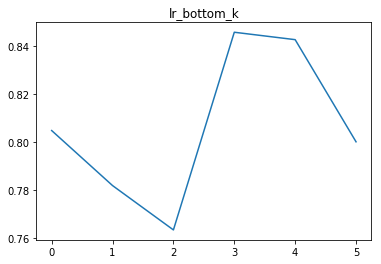

lr bottom_k_stoch 0.5
[[0.79307], [0.763923], [0.808574], [0.792276], [0.709287], [0.783038]]


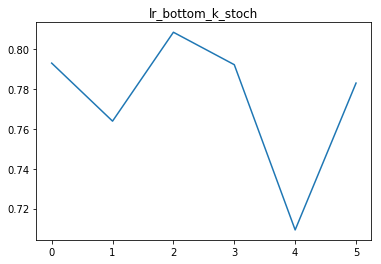

lr top_k 0.5
[[0.79849], [0.781988], [0.74638], [0.758614], [0.75813], [0.796748]]


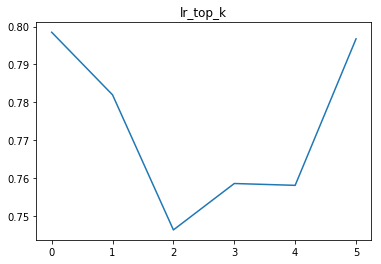

lr top_k_stoch 0.5
[[0.784553], [0.769164], [0.776423], [0.770325], [0.755285], [0.79187]]


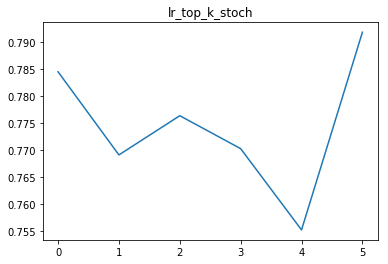

lr top_bottom_k 0.5
[[0.835501], [0.76489], [0.787398], [0.822764], [0.783925], [0.792609]]


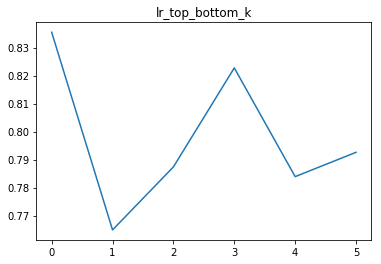

lr top_bottom_k_stoch 0.5
[[0.72659], [0.746712], [0.757012], [0.773519], [0.76144], [0.807666]]


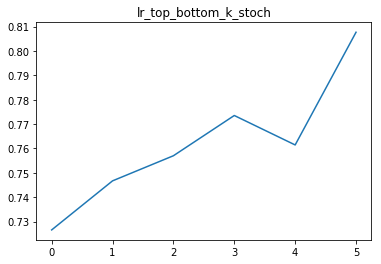

lr all_nodes_random 0.5
[[0.752947], [0.780249], [0.788966], [0.735017], [0.739647], [0.702352]]


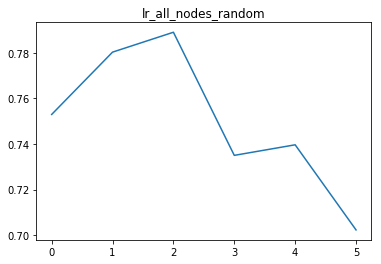

lr shared_nodes_random 0.5
[[0.790018], [0.811881], [0.78374], [0.77108], [0.742276], [0.688879]]


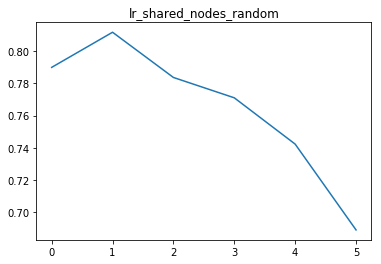

svm bottom_k 0.5
[[0.790018], [0.807782], [0.772358], [0.754847], [0.884553], [0.787456]]


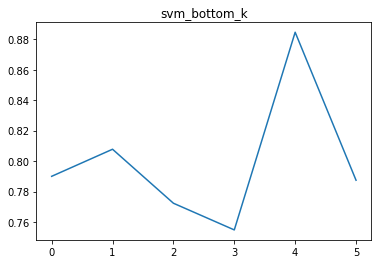

svm bottom_k_stoch 0.5
[[0.766417], [0.818699], [0.75784], [0.765521], [0.773984], [0.741543]]


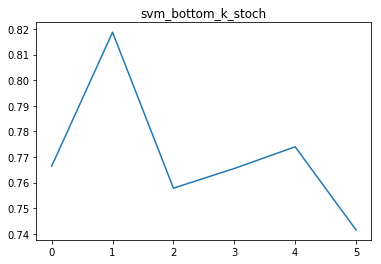

svm top_k 0.5
[[0.733885], [0.766417], [0.731171], [0.730457], [0.75775], [0.778397]]


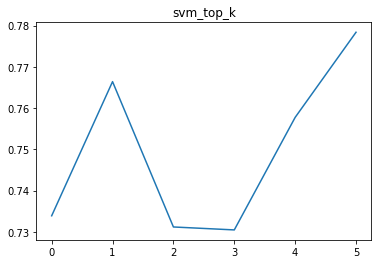

svm top_k_stoch 0.5
[[0.791521], [0.771006], [0.77542], [0.731171], [0.761324], [0.769454]]


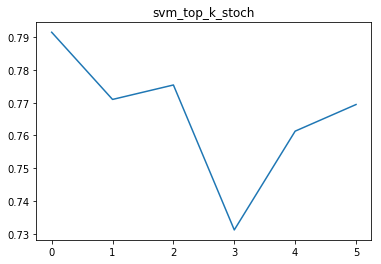

svm top_bottom_k 0.5
[[0.782401], [0.733885], [0.733885], [0.758505], [0.746268], [0.769919]]


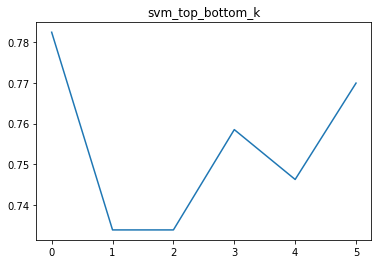

svm top_bottom_k_stoch 0.5
[[0.760118], [0.798171], [0.788966], [0.759725], [0.734611], [0.719217]]


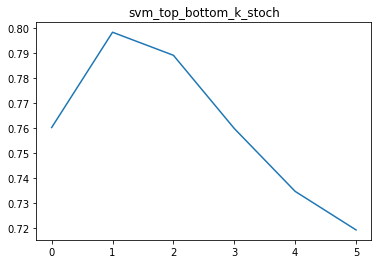

svm all_nodes_random 0.5
[[0.743902], [0.795224], [0.805571], [0.772358], [0.775797], [0.748316]]


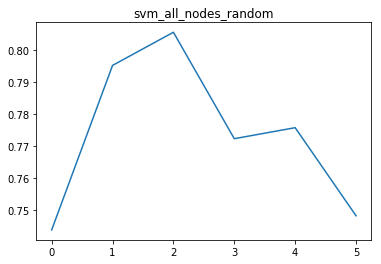

svm shared_nodes_random 0.5
[[0.776866], [0.793089], [0.773984], [0.756399], [0.704065], [0.748633]]


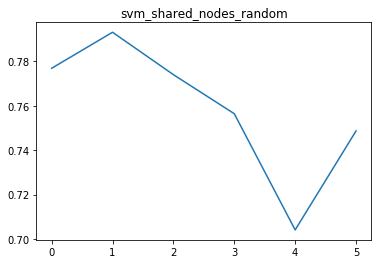

mlp bottom_k 0.5
[[0.79297], [0.805793], [0.729791], [0.774971], [0.817073], [0.811847]]


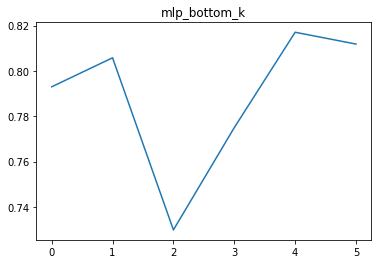

mlp bottom_k_stoch 0.5
[[0.765892], [0.790501], [0.79036], [0.846798], [0.752265], [0.836237]]


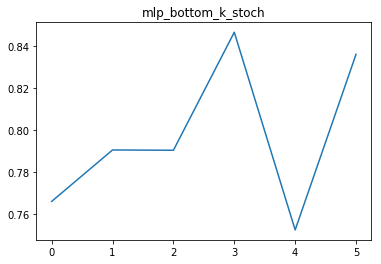

mlp top_k 0.5
[[0.784953], [0.805793], [0.748476], [0.742839], [0.779036], [0.817654]]


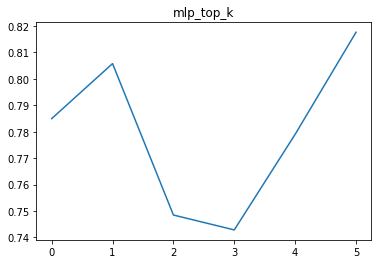

mlp top_k_stoch 0.5
[[0.825203], [0.809451], [0.776423], [0.769164], [0.746545], [0.774535]]


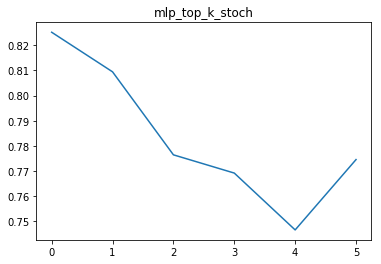

mlp top_bottom_k 0.5
[[0.807186], [0.786854], [0.776303], [0.787747], [0.778049], [0.782927]]


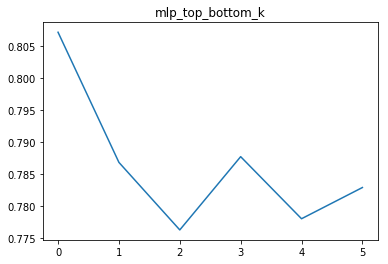

mlp top_bottom_k_stoch 0.5
[[0.81528], [0.755865], [0.738018], [0.811881], [0.760043], [0.738821]]


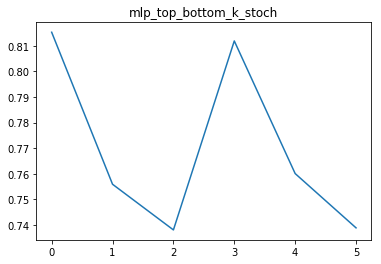

mlp all_nodes_random 0.5
[[0.7996], [0.780249], [0.77065], [0.815075], [0.746712], [0.699928]]


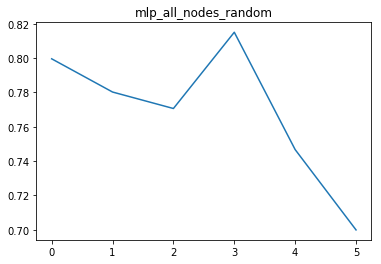

mlp shared_nodes_random 0.5
[[0.782927], [0.78628], [0.768641], [0.784553], [0.796603], [0.754007]]


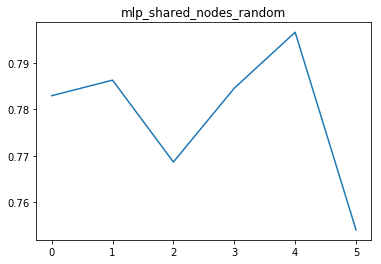

rf bottom_k 0.5
[[0.780488], [0.821377], [0.803717], [0.830275], [0.82561], [0.761452]]


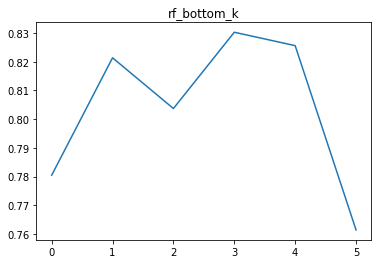

rf bottom_k_stoch 0.5
[[0.757557], [0.750199], [0.778862], [0.807908], [0.715331], [0.787456]]


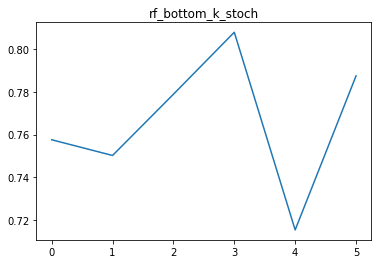

rf top_k 0.5
[[0.775172], [0.735261], [0.697251], [0.772164], [0.753132], [0.725997]]


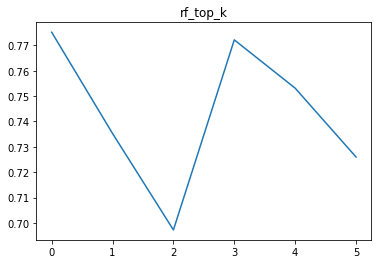

rf top_k_stoch 0.5
[[0.785953], [0.786934], [0.766128], [0.749666], [0.76189], [0.772358]]


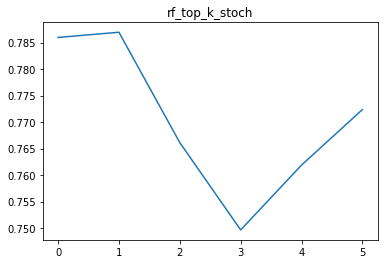

rf top_bottom_k 0.5
[[0.783569], [0.726118], [0.723307], [0.744715], [0.724135], [0.756399]]


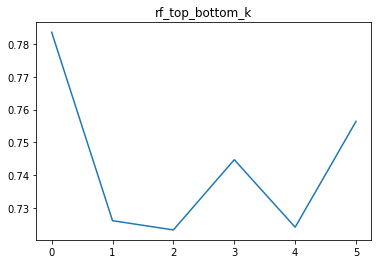

rf top_bottom_k_stoch 0.5
[[0.753], [0.81528], [0.732369], [0.785953], [0.724376], [0.736872]]


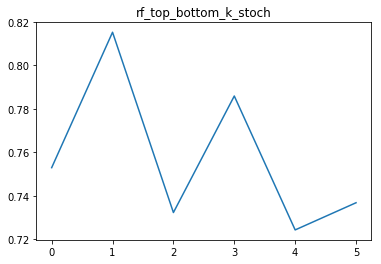

rf all_nodes_random 0.5
[[0.736725], [0.808169], [0.789779], [0.788722], [0.76489], [0.731134]]


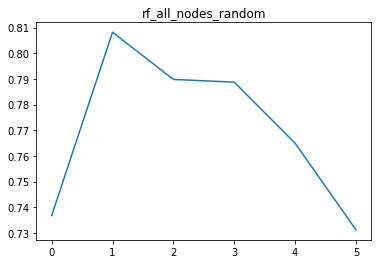

rf shared_nodes_random 0.5
[[0.745622], [0.767828], [0.772022], [0.753], [0.757557], [0.755226]]


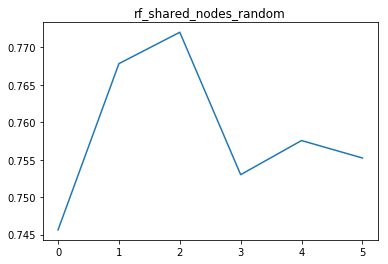

In [30]:
# from scipy.stat import spearmanr
# df = None
import matplotlib.pyplot as plt
classifiers = ['lr', 'svm','mlp','rf']
cond = ['bottom_k', 'bottom_k_stoch','top_k','top_k_stoch','top_bottom_k', 'top_bottom_k_stoch','all_nodes_random','shared_nodes_random']
for k in classifiers:
    tmp = []
    for i in cond:
        val = []

        for j in th:
            performance = list(map(float,folder['shared_gene'][k]['split=0.6']['node2vec'][i][str(j)]['ensemble']['precision'].tolist()))
            val.append(performance)
        print(k, i, j)
        print(val)
        plt.plot(val)
        plt.title(f'{k}_{i}')
        plt.show()
#     print(df.corr(method='spearman'))
# apply spearman coefficient whether increase number of threshold have any effect? 

In [ ]:
# determine the best model

In [ ]:
# plot distribution of all runs
# plot distirubtion of 10 rusn of each models
# plot distribution of horizontal row 
# plot distribution of vertical row. 

> For node2vec, select the best node2vec and plot node embedding of node2vec.
> For GCN, select the best GCN and plot node embedding of GCN.
    >exclude results of GCN pseudo label

> only select nodes that are not sharing any genes
> safe it so it can be quickly read back
> pick the same number of edges of each conditions (so that they are comparable)
> run on node2vec
> run on all classifiers of node2vec
> run GCN and save it to its classifier

> only select nodes that are not sharing any genes
> safe it so it can be quickly read back
> pick top 0.05 to 0.5 that are furthest away, run on node2vec and GCN + all classifier

> only select nodes that are in the same classes
> safe it so it can be quickly read back
> pick the same number of edges of each conditions (so that they are comparable)
    > number of added edges within the classe will be proportional to the class size
> run on node2vec
> run on all classifiers of node2vec
> run GCN and save it to its classifier

> only select nodes that are in the same classes
> safe it so it can be quickly read back
> pick the same number of edges of each conditions (so that they are comparable)
    > number of added edges within the classe will be proportional to the class size
> run on node2vec
> run on all classifiers of node2vec
> run GCN and save it to its classifier

> For node2vec, select the best node2vec and plot node embedding of node2vec.
> For GCN, select the best GCN and plot node embedding of GCN.
    >For pseudo label in GCN